# In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. 
The description of the dataset is as follows: 

## Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

   ### Attribute Information: 
   
   Listing of attributes: >50K, <=50K. 
   
   age: continuous.
   workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
   
   fnlwgt: continuous. 
   
   education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,               10th, Doctorate, 5th-6th, Preschool. 
   education-num: continuous.
   
   marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.      
   occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-                inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
   relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
   
   race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
   
   sex: Female, Male.
   
   capital-gain: continuous. 
   
   capital-loss: continuous.
   
   hours-per-week: continuous. 
   
   native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,                        Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                      Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,                      Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Following is the code to load required libraries and data: 
import numpy as np

import pandas as pd 

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machinelearning-databases/adult/adult.dat a', header = None) 

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learningdatabases/adult/adult.test' , skiprows = 1, header = None) 

col_labels = ["age", 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels 

test_set.columns = col_labels

In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
train_set = pd.read_csv('adult.data', header = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_set = pd.read_csv('adult.test', skiprows = 1, header = None)
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
col_labels = ["age", 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
train_set.columns == test_set.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [8]:
#checking is there any missing values or not ?
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [9]:
#checking is there any missing values or not ?
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
df = pd.DataFrame([train_set.dtypes , test_set.dtypes ],index = ['train_set' , 'test_set']).T
df

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [11]:
#Finding columns with data types as object
for i in train_set.columns:
    if train_set[i].dtypes=='object':
        print(i)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [12]:
print('(',train_set.workclass.nunique(),',' ,train_set.education.nunique(),',', train_set.marital_status.nunique(),',', train_set.occupation.nunique(),',' , 
train_set.relationship.nunique() ,',',train_set.race.nunique(),',', train_set.sex.nunique(),',', train_set.native_country.nunique() ,',', 
train_set.wage_class.nunique() ,')')

( 9 , 16 , 7 , 15 , 6 , 5 , 2 , 42 , 2 )


In [13]:
x_train = train_set.copy()
x_test = test_set.copy()

In [14]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [15]:
#converting categorical values into numerical values
dict_sex = {}
count = 0
for i in x_train.sex.unique():
    dict_sex[i]= count
    count+=1

In [16]:
dict_workclass = {}
count = 0
for i in x_train.workclass.unique():
    dict_workclass[i]= count
    count+=1

In [17]:
dict_education = {}
count = 0
for i in x_train.education.unique():
    dict_education[i]= count
    count+=1


dict_marital_status = {}
count = 0
for i in x_train.marital_status.unique():
    dict_marital_status[i]= count
    count+=1
    

dict_occupation = {}
count = 0
for i in x_train.occupation.unique():
    dict_occupation[i]= count
    count+=1
    
    
    
dict_relationship = {}
count = 0
for i in x_train.relationship.unique():
    dict_relationship[i]= count
    count+=1
    
    
    
dict_race = {}
count = 0
for i in x_train.race.unique():
    dict_race[i]= count
    count+=1

    
dict_native_country = {}
count = 0
for i in x_train.native_country.unique():
    dict_native_country[i]= count
    count+=1
    
    
    
dict_wage_class = {}
count = 0
for i in x_train.wage_class.unique():
    dict_wage_class[i]= count
    count+=1

    

    

In [18]:
dict_workclass,dict_education,dict_marital_status,dict_occupation,dict_relationship,dict_race,dict_sex,dict_native_country,dict_wage_class

({' State-gov': 0,
  ' Self-emp-not-inc': 1,
  ' Private': 2,
  ' Federal-gov': 3,
  ' Local-gov': 4,
  ' ?': 5,
  ' Self-emp-inc': 6,
  ' Without-pay': 7,
  ' Never-worked': 8},
 {' Bachelors': 0,
  ' HS-grad': 1,
  ' 11th': 2,
  ' Masters': 3,
  ' 9th': 4,
  ' Some-college': 5,
  ' Assoc-acdm': 6,
  ' Assoc-voc': 7,
  ' 7th-8th': 8,
  ' Doctorate': 9,
  ' Prof-school': 10,
  ' 5th-6th': 11,
  ' 10th': 12,
  ' 1st-4th': 13,
  ' Preschool': 14,
  ' 12th': 15},
 {' Never-married': 0,
  ' Married-civ-spouse': 1,
  ' Divorced': 2,
  ' Married-spouse-absent': 3,
  ' Separated': 4,
  ' Married-AF-spouse': 5,
  ' Widowed': 6},
 {' Adm-clerical': 0,
  ' Exec-managerial': 1,
  ' Handlers-cleaners': 2,
  ' Prof-specialty': 3,
  ' Other-service': 4,
  ' Sales': 5,
  ' Craft-repair': 6,
  ' Transport-moving': 7,
  ' Farming-fishing': 8,
  ' Machine-op-inspct': 9,
  ' Tech-support': 10,
  ' ?': 11,
  ' Protective-serv': 12,
  ' Armed-Forces': 13,
  ' Priv-house-serv': 14},
 {' Not-in-family': 0,
 

In [19]:
x_train["workclass"]=x_train["workclass"].map(dict_workclass) 
x_train['education']=x_train["education"].map(dict_education) 
x_train['marital_status']=x_train['marital_status'].map(dict_marital_status) 
x_train['occupation']=x_train['occupation'].map(dict_occupation) 
x_train['relationship']=x_train['relationship'].map(dict_relationship) 
x_train['race']=x_train['race'].map(dict_race) 
x_train['sex']=x_train['sex'].map(dict_sex) 
x_train['native_country']=x_train['native_country'].map(dict_native_country)
x_train['wage_class']=x_train['wage_class'].map(dict_wage_class) 

In [20]:
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [21]:
xtrain = x_train.astype(int)

In [22]:
x_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [23]:
x_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,3.424465,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317,0.240810
std,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [24]:
dict_native_country = {}
count = 0
for i in x_test.native_country.unique():
    dict_native_country[i]= count
    count+=1
    
    
    
dict_wage_class = {}
count = 0
for i in x_test.wage_class.unique():
    dict_wage_class[i]= count
    count+=1

In [25]:
x_test["workclass"]=x_test["workclass"].map(dict_workclass) 
x_test['education']=x_test["education"].map(dict_education) 
x_test['marital_status']=x_test['marital_status'].map(dict_marital_status) 
x_test['occupation']=x_test['occupation'].map(dict_occupation) 
x_test['relationship']=x_test['relationship'].map(dict_relationship) 
x_test['race']=x_test['race'].map(dict_race) 
x_test['sex']=x_test['sex'].map(dict_sex) 
x_test['native_country']=x_test['native_country'].map(dict_native_country)
x_test['wage_class']=x_test['wage_class'].map(dict_wage_class) 

In [26]:
dict_wage_class

{' <=50K.': 0, ' >50K.': 1}

In [27]:
x_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0


In [28]:
x_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16281.000000,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,2.315030,1.894357e+05,3.386954,10.072907,1.084270,4.731159,1.531171,0.217309,0.332965,1081.905104,87.899269,40.392236,1.219151,0.236226
std,13.849187,1.246499,1.057149e+05,3.440725,2.567545,1.269622,3.425948,1.445369,0.622232,0.471289,7583.935968,403.105286,12.479332,4.963702,0.424776
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.167360e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.778310e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.383840e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,40.000000,1.000000


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\idofa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

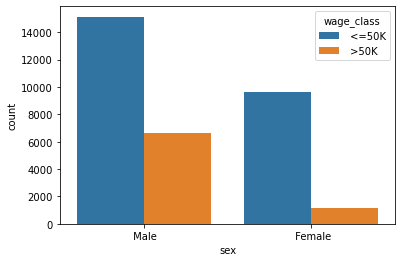

In [30]:
sns.countplot('sex',data = train_set , hue = "wage_class")

C:\Users\idofa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, ' State-gov'),
 Text(1, 0, ' Self-emp-not-inc'),
 Text(2, 0, ' Private'),
 Text(3, 0, ' Federal-gov'),
 Text(4, 0, ' Local-gov'),
 Text(5, 0, ' ?'),
 Text(6, 0, ' Self-emp-inc'),
 Text(7, 0, ' Without-pay'),
 Text(8, 0, ' Never-worked')]

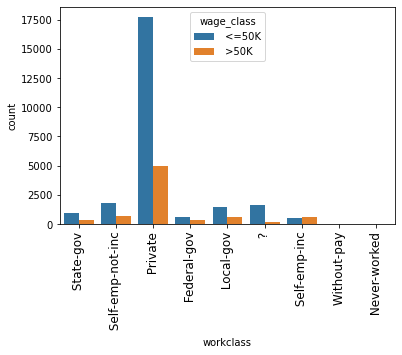

In [31]:
g = sns.countplot('workclass',data = train_set , hue = "wage_class")
g.set_xticklabels(g.get_xticklabels() , rotation =90 , fontsize = 12)

C:\Users\idofa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, ' Bachelors'),
 Text(1, 0, ' HS-grad'),
 Text(2, 0, ' 11th'),
 Text(3, 0, ' Masters'),
 Text(4, 0, ' 9th'),
 Text(5, 0, ' Some-college'),
 Text(6, 0, ' Assoc-acdm'),
 Text(7, 0, ' Assoc-voc'),
 Text(8, 0, ' 7th-8th'),
 Text(9, 0, ' Doctorate'),
 Text(10, 0, ' Prof-school'),
 Text(11, 0, ' 5th-6th'),
 Text(12, 0, ' 10th'),
 Text(13, 0, ' 1st-4th'),
 Text(14, 0, ' Preschool'),
 Text(15, 0, ' 12th')]

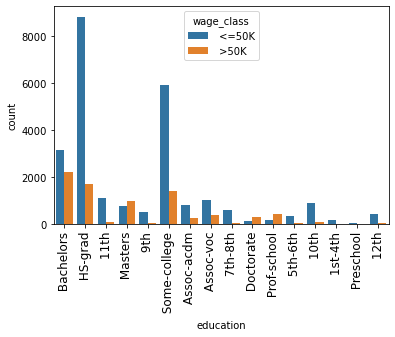

In [32]:
g = sns.countplot('education',data = train_set , hue = "wage_class")
g.set_xticklabels(g.get_xticklabels() , rotation =90 , fontsize = 12)

C:\Users\idofa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

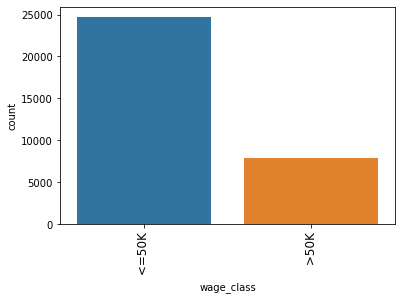

In [33]:
g = sns.countplot("wage_class",data = train_set , )
g.set_xticklabels(g.get_xticklabels() , rotation =90 , fontsize = 12)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

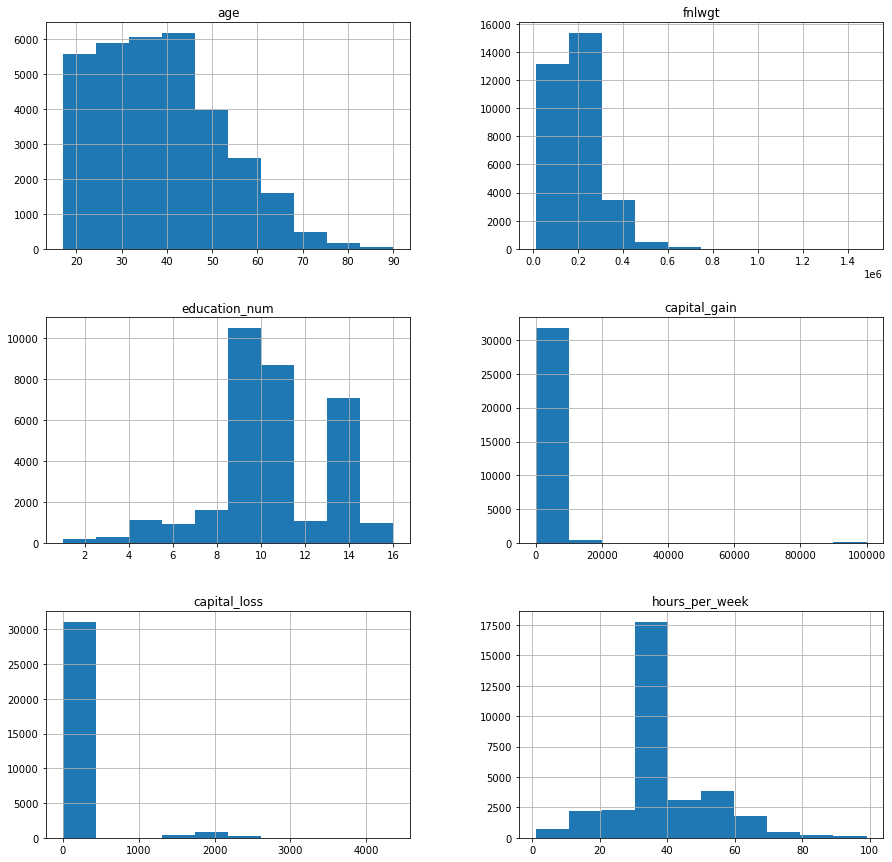

In [34]:
pd.DataFrame.hist(train_set , figsize=[15,15])

In [35]:
y_train = x_train['wage_class']
x_train = x_train.drop('wage_class',axis =1 )

y_test = x_test['wage_class']
x_test = x_test.drop('wage_class',axis =1)

In [36]:
X = x_train.values
Y = y_train.values
Xtest = x_test.values
Ytest = y_test.values

In [37]:
x_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1


In [38]:
x_train.shape , y_train.shape , X.shape , Y.shape , Xtest.shape , Ytest.shape

((32561, 14), (32561,), (32561, 14), (32561,), (16281, 14), (16281,))

In [39]:
from xgboost.sklearn import XGBClassifier

In [40]:
#set the parameter for XGBoost model
params = {
    "objective": "binary:logistic",
    'max_depth':2,
    'learning_rate':1.0,
    'silent':1.0,
    'n_estimstor':5
}
params['eval_metric'] = ['logloss','auc']

In [41]:
#Train the XGBoost model classifier
bst = XGBClassifier(**params).fit(X,Y)

C:\Users\idofa\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimstor, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [42]:
#predicting the annual income
pred = bst.predict(Xtest)
pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [43]:
pred_prob = bst.predict_proba(Xtest)
pred_prob

array([[9.9924290e-01, 7.5711834e-04],
       [8.0084783e-01, 1.9915217e-01],
       [6.3513732e-01, 3.6486265e-01],
       ...,
       [2.4961776e-01, 7.5038224e-01],
       [9.0756387e-01, 9.2436157e-02],
       [2.9993576e-01, 7.0006424e-01]], dtype=float32)

In [44]:
#measure the accuracy of this model
correct = 0
from sklearn.metrics import accuracy_score
for i in range(len(pred)):
    if(y_test[i]==pred[i]):
        correct+=1
        
acc = accuracy_score(Ytest , pred)


print("Predicted correctly :-",correct , '/',len(pred))
print("Accuracy score :-{:.4f}".format(acc))
print("Error:- {0:.4f}".format(1-acc))

Predicted correctly :- 14196 / 16281
Accuracy score :-0.8719
Error:- 0.1281


In [45]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.77      0.66      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.80      0.81     16281
weighted avg       0.87      0.87      0.87     16281



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

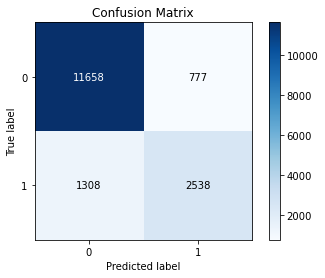

In [46]:
#Creating confusion matrix
import scikitplot
scikitplot.metrics.plot_confusion_matrix(Ytest , pred)

C:\Users\idofa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

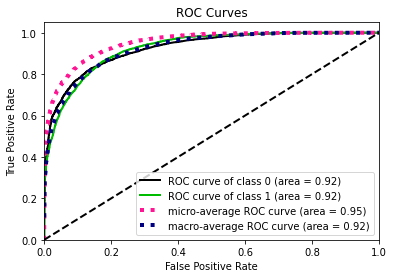

In [47]:
#Creating ROC
scikitplot.metrics.plot_roc_curve(Ytest , pred_prob)

In [ ]:
pip install scikitplot

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X , Y)

In [ ]:
pred_lr = lr.predict(Xtest)
pred_lr

In [ ]:
pred_lr_prob = lr.predict_proba(Xtest)
pred_lr_prob

In [ ]:
print("Accuracy score :-{:.4f}".format(accuracy_score(Ytest , pred_lr)))

In [ ]:
print(classification_report(Ytest,pred_lr))

In [ ]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(Ytest , pred_lr)

In [ ]:
#Creating ROC
scikitplot.metrics.plot_roc_curve(Ytest , pred_lr_prob)

In [ ]:
#Using bagging method and base method as logistic regression
from sklearn.ensemble import BaggingClassifier
bag_LR = BaggingClassifier(LogisticRegression() , n_estimators=10,max_samples=0.5,bootstrap=True,random_state=3)

In [ ]:
bag_LR.fit(X,Y)

In [ ]:
#Prediction by bagging ensemble technique
bag_pred = bag_LR.predict(Xtest)
bag_pred

In [ ]:
bag_pred_prob = bag_LR.predict_proba(Xtest)
bag_pred_prob

In [ ]:
#Score of the bagging ensemble model
bag_LR.score(Xtest ,Ytest)

In [ ]:
print("Accuracy score :-{:.4f}".format(accuracy_score(Ytest , bag_pred)))

In [ ]:
print(classification_report(Ytest,bag_pred))

In [ ]:
#Creating ROC
scikitplot.metrics.plot_roc_curve(Ytest , bag_pred_prob)

In [ ]:
#CONCLUSION
#The boosting classifier method yields a better performance in this scenario as compare to single random binary
#classifier and bagging method